In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [37]:
df=pd.read_csv('/content/drive/MyDrive/Data Analytics/Feature Engineering/covid_toy.csv')

In [38]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


#Training the Data

In [39]:
#First we will train , test data
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['has_covid']),df['has_covid'],test_size=0.2)
X_train

,age,gender,fever,cough,city
50,19,Male,101.0,Mild,Delhi
76,80,Male,100.0,Mild,Bangalore
22,71,Female,98.0,Strong,Kolkata
28,16,Male,104.0,Mild,Kolkata
87,47,Male,101.0,Strong,Bangalore
...,...,...,...,...,...
9,64,Female,101.0,Mild,Delhi
44,20,Male,102.0,Strong,Delhi
61,81,Female,98.0,Strong,Mumbai
73,34,Male,98.0,Strong,Kolkata


#Checking the outliers through Box Plot

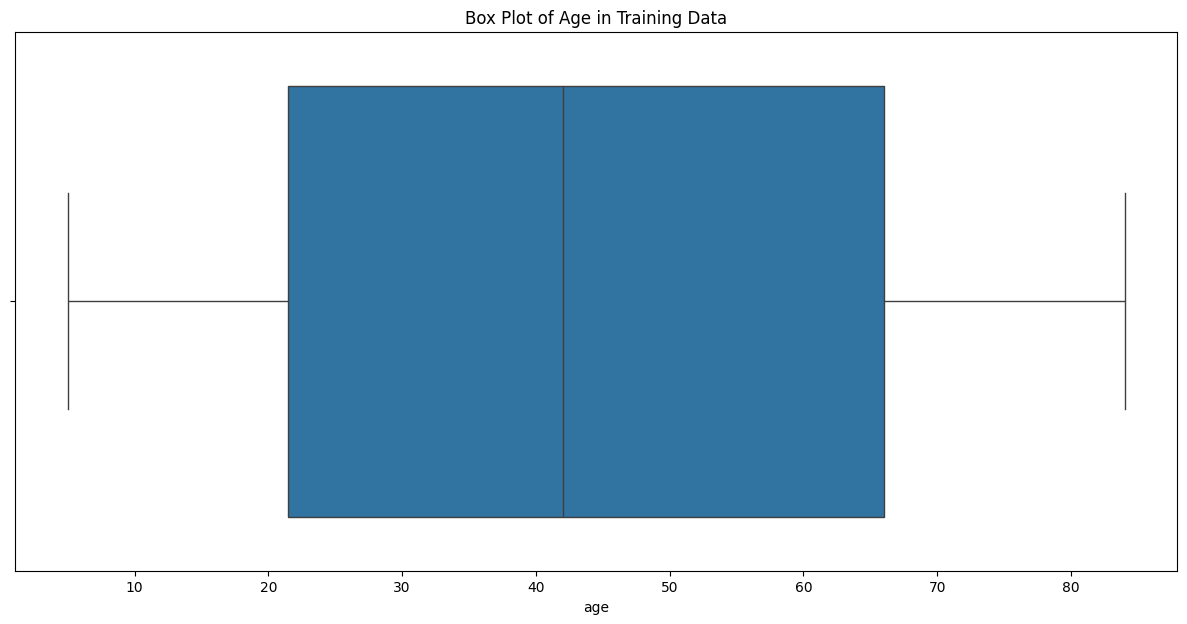

In [40]:
plt.figure(figsize=(15, 7))
sns.boxplot(x=X_train['age'])
plt.title('Box Plot of Age in Training Data')
plt.show()

#Removing the Outliers

In [41]:
len(df)

100

In [42]:
def removeOutliers(df,column_name):
  Q1=df[column_name].quantile(0.25)
  Q3=df[column_name].quantile(0.75)
  IQR=Q3-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
  df_no_outlier=df[(df[column_name]>lower_limit) & (df[column_name]<upper_limit)]
  return df_no_outlier


In [43]:
removeOutliers(df,'age')

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No
...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,No
96,51,Female,101.0,Strong,Kolkata,Yes
97,20,Female,101.0,Mild,Bangalore,No
98,5,Female,98.0,Strong,Mumbai,No


In [44]:
removeOutliers(df,'fever')

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No
...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,No
96,51,Female,101.0,Strong,Kolkata,Yes
97,20,Female,101.0,Mild,Bangalore,No
98,5,Female,98.0,Strong,Mumbai,No


In [45]:
len(df)  #as there is no outliers so len will remain same

100

#One Hot Encoding

In [46]:
df['city'].value_counts()

city
Kolkata      32
Bangalore    30
Delhi        22
Mumbai       16
Name: count, dtype: int64

In [47]:
df['gender'].value_counts()

gender
Female    59
Male      41
Name: count, dtype: int64

In [48]:
ohe=OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)
X_train_city_gender=ohe.fit_transform(X_train[['city','gender']])
X_test_city_gender=ohe.transform(X_test[['city','gender']])
X_train_city_gender

array([[1, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 1, 0, 1],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 1],
       [0, 0, 1, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 0],
       [1, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0,

In [49]:
X_train_city_gender=pd.DataFrame(X_train_city_gender,index=X_train.index,columns=ohe.get_feature_names_out(['city','gender']))
X_test_city_gender=pd.DataFrame(X_test_city_gender,index=X_test.index,columns=ohe.get_feature_names_out(['city','gender']))

#Ordinary Encoder

In [50]:
oe=OrdinalEncoder(dtype=np.int32,categories=[['Mild','Strong']])
X_train_cough=oe.fit_transform(X_train[['cough']])
X_test_cough=oe.transform(X_test[['cough']])

In [51]:
X_train_cough = pd.DataFrame(X_train_cough, index=X_train.index, columns=['cough'])
X_test_cough = pd.DataFrame(X_test_cough, index=X_test.index, columns=['cough'])

#To make changes in both

In [52]:
X_train = X_train.drop(['gender', 'city', 'cough'], axis=1).reset_index(drop=True)
X_test = X_test.drop(['gender', 'city', 'cough'], axis=1).reset_index(drop=True)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_city_gender.reset_index(drop=True), X_train_cough.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_city_gender.reset_index(drop=True), X_test_cough.reset_index(drop=True)], axis=1)


In [53]:
X_train

,age,fever,city_Delhi,city_Kolkata,city_Mumbai,gender_Male,cough
0,19,101.0,1,0,0,1,0
1,80,100.0,0,0,0,1,0
2,71,98.0,0,1,0,0,1
3,16,104.0,0,1,0,1,0
4,47,101.0,0,0,0,1,1
...,...,...,...,...,...,...,...
75,64,101.0,1,0,0,0,0
76,20,102.0,1,0,0,1,1
77,81,98.0,0,0,1,0,1
78,34,98.0,0,1,0,1,1


#Scaling

In [55]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['age','fever']])
X_test_scaled = scaler.transform(X_test[['age','fever']])



In [56]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=['age', 'fever'], index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=['age', 'fever'], index=X_test.index)


In [57]:
# Replace the original 'age' and 'fever' columns with the scaled ones
X_train[['age', 'fever']] = X_train_scaled_df
X_test[['age', 'fever']] = X_test_scaled_df

In [58]:
X_train

,age,fever,city_Delhi,city_Kolkata,city_Mumbai,gender_Male,cough
0,-1.036511,0.042897,1,0,0,1,0
1,1.467535,-0.457563,0,0,0,1,0
2,1.098086,-1.458483,0,1,0,0,1
3,-1.159661,1.544276,0,1,0,1,0
4,0.112887,0.042897,0,0,0,1,1
...,...,...,...,...,...,...,...
75,0.810736,0.042897,1,0,0,0,0
76,-0.995461,0.543356,1,0,0,1,1
77,1.508585,-1.458483,0,0,1,0,1
78,-0.420762,-1.458483,0,1,0,1,1
